<a href="https://colab.research.google.com/github/kbdp1305/Telkom-s-Stock-Prediction-using-Genetic-Algorithm/blob/main/GA_Telkom_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Code

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import statistics
import random as random
from sklearn.model_selection import train_test_split 

In [2]:
df=pd.read_excel('data.xlsx')
df


,Date,Open,Close,High,Low,Volume
0,2021-01-04,3320,3490,3500,3310,165339800
1,2021-01-05,3480,3470,3480,3420,157800700
2,2021-01-06,3470,3370,3490,3330,177877900
3,2021-01-07,3390,3390,3450,3380,140221900
4,2021-01-08,3450,3570,3620,3440,492643700
...,...,...,...,...,...,...
444,2022-10-25,4430,4390,4470,4390,109228600
445,2022-10-26,4420,4370,4430,4330,84661900
446,2022-10-27,4390,4370,4410,4340,80281900
447,2022-10-28,4420,4450,4450,4380,68630200


In [3]:
dataTrain=df.iloc[:int(0.8*len(df)),:]

In [4]:
dataTrain

,Date,Open,Close,High,Low,Volume
0,2021-01-04,3320,3490,3500,3310,165339800
1,2021-01-05,3480,3470,3480,3420,157800700
2,2021-01-06,3470,3370,3490,3330,177877900
3,2021-01-07,3390,3390,3450,3380,140221900
4,2021-01-08,3450,3570,3620,3440,492643700
...,...,...,...,...,...,...
354,2022-06-20,4050,4040,4060,4000,82101200
355,2022-06-21,4060,4110,4120,4030,77489000
356,2022-06-22,4090,4050,4090,4040,60907800
357,2022-06-23,4030,4160,4160,4030,101065400


In [5]:
def splitData(dataframe, train_data):
    # Your code for splitting the data goes here
    pass  # Placeholder, replace with your implementation

# Now you can use the splitData function
DataTes = splitData(df, dataTrain)

In [6]:
DataTes

In [7]:
dataTrain=df.sample(frac=0.8,ignore_index=True)
dataTrain

,Date,Open,Close,High,Low,Volume
0,2021-02-22,3210,3170,3240,3170,100425500
1,2021-11-30,4150,3990,4170,3990,435800600
2,2022-06-08,4150,4100,4170,4080,202555900
3,2022-07-07,4040,4040,4050,4010,42393800
4,2022-07-06,4050,4020,4050,3970,62679000
...,...,...,...,...,...,...
354,2021-06-24,3330,3250,3360,3240,101334200
355,2022-09-23,4400,4380,4430,4380,95911400
356,2021-12-06,4060,4170,4250,4050,106756900
357,2021-06-28,3250,3170,3260,3170,66338900


In [8]:
dataTrain.head(10)

,Date,Open,Close,High,Low,Volume
0,2021-02-22,3210,3170,3240,3170,100425500
1,2021-11-30,4150,3990,4170,3990,435800600
2,2022-06-08,4150,4100,4170,4080,202555900
3,2022-07-07,4040,4040,4050,4010,42393800
4,2022-07-06,4050,4020,4050,3970,62679000
5,2022-04-08,4580,4580,4610,4560,161974500
6,2022-06-15,4060,4060,4080,4030,94848800
7,2022-03-16,4660,4630,4660,4550,109961900
8,2021-03-05,3340,3320,3370,3320,128546000
9,2022-09-13,4540,4520,4560,4520,91510200


In [9]:
dataTrain.sort_index(axis=0,ascending=True).head(10)


,Date,Open,Close,High,Low,Volume
0,2021-02-22,3210,3170,3240,3170,100425500
1,2021-11-30,4150,3990,4170,3990,435800600
2,2022-06-08,4150,4100,4170,4080,202555900
3,2022-07-07,4040,4040,4050,4010,42393800
4,2022-07-06,4050,4020,4050,3970,62679000
5,2022-04-08,4580,4580,4610,4560,161974500
6,2022-06-15,4060,4060,4080,4030,94848800
7,2022-03-16,4660,4630,4660,4550,109961900
8,2021-03-05,3340,3320,3370,3320,128546000
9,2022-09-13,4540,4520,4560,4520,91510200


In [10]:
def splitData(df1,df2) :
  #merge two DataFrames and create indicator column
  df_all = df1.merge(df2.drop_duplicates(),
                   how='left', indicator=True)

#create DataFrame with rows that exist in first DataFrame only
  df1_only = df_all[df_all['_merge'] == 'left_only']
  df1_only = df1_only.drop('_merge', axis=1)
  df1_only=df1_only.reset_index()
  df1_only=df1_only.drop('index',axis=1)
  return df1_only


In [11]:
dataTes=splitData(df,dataTrain)

In [12]:
dataTes

,Date,Open,Close,High,Low,Volume
0,2021-01-04,3320,3490,3500,3310,165339800
1,2021-01-18,3480,3450,3520,3430,138913100
2,2021-02-03,3250,3240,3330,3220,86433900
3,2021-02-05,3320,3290,3320,3270,52630500
4,2021-02-09,3250,3200,3300,3180,157479200
...,...,...,...,...,...,...
85,2022-08-19,4560,4600,4610,4460,177623900
86,2022-10-18,4310,4250,4340,4250,72516000
87,2022-10-20,4200,4350,4350,4200,165391500
88,2022-10-25,4430,4390,4470,4390,109228600


In [13]:
def data_hari(file_data,banyak_data,data_yang_akan_diprediksi) :
  data=file_data.iloc[-(banyak_data):,data_yang_akan_diprediksi:data_yang_akan_diprediksi+1].values
  return data 

In [14]:
a=data_hari(df,10,1)


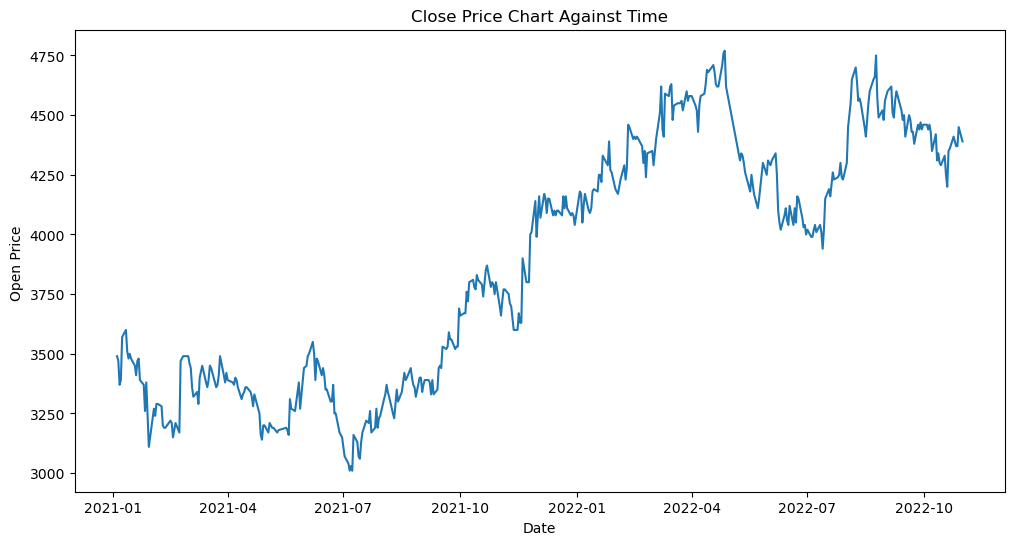

In [15]:
saham_Telkomsel_y=[]
a=df.iloc[-31:-1,2:3].values
for i in range(len(a)) :
  saham_Telkomsel_y.append(a[i])
saham_Telkomsel_Tanggal=[]
b=df.iloc[-31:-1,0:1]
for j in range(len(b)) :
  saham_Telkomsel_Tanggal.append(j)

plt.figure(figsize=(12, 6))
plt.title("Close Price Chart Against Time")
plt.plot(df['Date'],df['Close'])
plt.xlabel("Date")
plt.ylabel("Open Price ")
plt.show
print("\n")
plt.show()

In [16]:
def create_member(number_of_days) :
  N=number_of_days
  route= np.full(1,random.uniform(-1,1),dtype=float)
  go =True
  i=1
  while go :
    route=np.append(route,random.uniform(-1,1))
    if len(route)==number_of_days :
      go=False
    else :
      i+=1
  return route

In [17]:
def initiate_population (size,number_of_days) :
  population=[]
  for i in range(size) :
    population.append(create_member(number_of_days))
  return population

In [18]:
def fitness(population,data) :
  fitness_temp=[]
  fitness=[]
  temporary_y=[]
  data=data.copy()
  temp_hasil=[]
  h=0
  data=data.copy()


 
  final_hasil=[]
  j=0
  for i in population :
    hasil=[]
    usa=[]
    counter=0
    index=(len(data)-1)
    temp_index=(len(data)-1)
    tes_sum=0
    h+=1

    while ((temp_index)>=0 and (index-(len(i)-1))>=0) :

      hasil_akhir=[]
      sum=0
      for j in range(len(i)):
        if temp_index>=0 :
         if j == 0 :
          y=i[j]*1
          sum+=y
          temp_index=temp_index-1
         else : 
          y=i[j]*data[temp_index]
          
          sum+=y
          temp_index=temp_index-1  

        
      tes_sum+=pow(data[index]-sum,2)
      bay=pow(data[index]-sum,2)
      hasil.append(math.sqrt(pow(data[index]-sum,2)))
      counter+=1 
      usa.append(pow(data[index]-sum,2))
      index=index-1
      temp_index=index
      
     

    
    a_temp=(1/counter)*(np.sum(hasil))

    temp_hasil.append(1/a_temp)
  for g in range(len(temp_hasil)) :
    if temp_hasil[g]==max(temp_hasil) :
      temp_index=g

    
  return temp_hasil
    
  



In [19]:
data_hari(df,5,1)

array([[4430],
       [4420],
       [4390],
       [4420],
       [4460]], dtype=int64)

In [20]:
def probability_of_rw(fitness) :
  our_fitness=fitness
  sum=0
  prob_per_i=[]
  for i in our_fitness :
    sum+=i
  for j in range(len(our_fitness)):
    prob_per_i.append(our_fitness[j]/sum)
  return prob_per_i
  

In [21]:
def cumulative_rw(prob) :
  probability_per_i=prob
  sum=0
  cumulative_sum=[0]
  for i in probability_per_i :
    sum+=i
    cumulative_sum.append(sum)
  return cumulative_sum

In [22]:
def roullete_whell(population,data,jumlah_anak) : 
  nilai_fitness=fitness(population,data)
  probability_of_roulette = probability_of_rw(nilai_fitness)
  cumulative_sum=cumulative_rw(probability_of_roulette)
  Pool_size=jumlah_anak
  pool=[]
  terpilih=[]
  later_pool=[]
  population=population.copy()
  data=data.copy()
  jumlah_anak=jumlah_anak
  
  
  
  index=0
  while len(pool)<jumlah_anak :
    selisih=10000
    generate_random=random.uniform(0,max(cumulative_sum))
    for i in range(len(cumulative_sum)) :
      if ((cumulative_sum[i]-generate_random) >=0 and (cumulative_sum[i]-generate_random) < selisih and i not in terpilih):
        selisih=(cumulative_sum[i]-generate_random)
        index=(i-1) 
    if (index+1) not in terpilih : 
     pool.append(population[index])
     terpilih.append(index+1)
  while (len(later_pool)+len(pool))<len(population) :
    j=random.randint(0,len(population)-1)
    if j not in terpilih:
      later_pool.append(population[j])
      terpilih.append(j)

  return pool,later_pool







In [23]:
def mutation(parent,pm) :
  new_parent=np.array([0]*len(parent),dtype=float)
  for i in range(len(parent)) :
    if random.uniform(0,1)<pm :
      new_parent[i] = random.uniform(-1,1)
    else :
      new_parent[i]=parent[i]
  return new_parent


In [24]:
def crossover(parent1,parent2) :
  k=random.randint(0,len(parent1)-1)
  alpha=0.75
  child1=np.array([0]*len(parent1),dtype=float)
  child2=np.array([0]*len(parent1),dtype=float)
  for i in range(len(parent1)) :
    if i<=k :
      child1[i]=parent1[i]
      child2[i]=parent2[i]
    else:
      child1[i]=(alpha*parent2[i])+((1-alpha)*parent1[i])
      child2[i]=(alpha*parent1[i])+((1-alpha)*parent2[i])
  return child1,child2
      


In [25]:
def generational_model(mating_pool,population,later_pool,data,pc,pm) :
  N=len(mating_pool)
  pc=pc
  temp_mating=[]
  Cross_Over=[]
  number_of_later_pool=0
  terpilih=[]
  index_choosed=[]
  New_Generation=[]
  population_tidak_terpilih=[]
  fitness_kedua=0
  number_of_mutation=0
  fitness_mating=fitness(mating_pool,data)
  while len(Cross_Over)<len(mating_pool) :
    while len(temp_mating)<2 :
      random_index=random.randint(0,N-1)
      if random.uniform(0,1)<pc and random_index not in terpilih :
        if fitness_mating[random_index]==max(fitness_mating) :
          for f in range(len(mating_pool)) :
            if fitness_mating[f] > fitness_kedua and fitness_mating[f]<max(fitness_mating):
              index_kedua=f
          temp_mating.append(mating_pool[random_index])
          temp_mating.append(mating_pool[index_kedua])
          terpilih.append(random_index)
          terpilih.append(index_kedua)

        else :
          for f in range(len(mating_pool)) :
            if fitness_mating[f] > fitness_kedua and fitness_mating[f]<max(fitness_mating):
              index_kedua=f
          if random_index != index_kedua : 
           temp_mating.append(mating_pool[random_index])
           terpilih.append(random_index)
          else : 
            pass
    a=crossover(temp_mating[0],temp_mating[1])
    Cross_Over+=crossover(temp_mating[0],temp_mating[1])
    temp_mating.pop(0)
    temp_mating.pop(0)
  for k in range(len(Cross_Over)) :
    Cross_Over[k]=mutation(Cross_Over[k],pm)
  
  fitness_for_new_gen=fitness(Cross_Over,data) ## ELITISM
  min_value_new_gen=min(fitness_for_new_gen)
  fitness_old_gen=fitness(mating_pool,data)
  max_old_fitness=max(fitness_old_gen)
  if min_value_new_gen < max_old_fitness :
    for i in range(len(mating_pool)) :
      if fitness_old_gen[i]==max_old_fitness :
        index_old_gen=i
    for j in range(len(Cross_Over)) :
      if fitness_for_new_gen[j]==min_value_new_gen :
        index_new_gen=j
    Cross_Over[index_new_gen]=mating_pool[index_old_gen]
  for k in range(len(Cross_Over)) :
    New_Generation.append(Cross_Over[k])  
                                         

  while len(population_tidak_terpilih)+len(New_Generation)<len(population) :
      population_tidak_terpilih.append(mutation(later_pool[number_of_later_pool],pm))
      number_of_later_pool+=1
  ##Elitism Mutasi
  fitness_new_mutation=fitness(population_tidak_terpilih,data)
  fitness_old_pool=fitness(later_pool,data)
  for b in range(len(later_pool)) :
    if fitness_new_mutation[b] < fitness_old_pool[b] :
      population_tidak_terpilih[b] = later_pool[b]
  while len(New_Generation)<len(population) :
    New_Generation.append(population_tidak_terpilih[number_of_mutation])
    number_of_mutation+=1 
  
  return New_Generation

    


       



In [26]:
def best_fitness(fitness) :
  maximum=max(fitness)
  return max

In [27]:
df.head(5)

,Date,Open,Close,High,Low,Volume
0,2021-01-04,3320,3490,3500,3310,165339800
1,2021-01-05,3480,3470,3480,3420,157800700
2,2021-01-06,3470,3370,3490,3330,177877900
3,2021-01-07,3390,3390,3450,3380,140221900
4,2021-01-08,3450,3570,3620,3440,492643700


In [28]:
def cek_nilai_y(pop,data,tipe_prediksi,hari_ke) :
  sum=0
  data=data.iloc[:,tipe_prediksi:tipe_prediksi+1].values
  
  panjang_data=hari_ke
  for i in range(len(pop)) :
    if i == 0 :
      y=pop[i]*1
      sum+=y
    else :
      y=pop[i]*data[panjang_data-1]
      sum+=y
   
      panjang_data-=1
  return sum
  

  




In [29]:
def main() :
  population_size=int(input("Population Size : \n There are at least 4 Populations : \n"))
  jumlah_hari=int(input("Chromosome Length: "))
  pc=float(input("Cross Over Probability: "))
  pm=float(input("Mutation Probability: "))
  pop=initiate_population(population_size,jumlah_hari)
  jumlah_data=int(input("Data Size: "))
  tipe_prediksi=int(input("Price to be predicted: \n Type in numbers \n 1. Open Price \n 2. Close Price \n 3. High Price \n 4. Low Price \n"))
  data_hari_sebelum=data_hari(df,jumlah_data,tipe_prediksi)
  data_sebelum=jumlah_hari
  jumlah_generasi = int(input("Number of Generations: "))
  
  if population_size//2 < 4 :
    jumlah_anak_mating=4
  elif (population_size//2)%2==1 :
    jumlah_anak_mating=(population_size//2)+1
  else :
    jumlah_anak_mating =population_size/2

  
  Hari_ke=int(input("Will Predict What Day:\n "+ "("+str(jumlah_hari-1)+"-"+str(len(df.iloc[:,1:2].values)-1)+")"))
  fitness_terbaik=0
  index_fitness_terbaik=0
  y=0
  plot_y2=[]
  plot_x1=[]
  plot_y1=[]
  
  for i in range(jumlah_generasi) :
    nilai_fitness=fitness(pop,data_hari_sebelum)
    plot_x1.append(i)
    for k in range(len(nilai_fitness)) :
      if nilai_fitness[k]==max(nilai_fitness):
        index_bgen_generasi=k
    plot_y1.append(cek_nilai_y(pop[index_bgen_generasi],df,tipe_prediksi,Hari_ke))
    if max(nilai_fitness) >= fitness_terbaik :
      fitness_terbaik=max(nilai_fitness)
      index_fitness_terbaik=i
      for j in range(len(pop)) :
       if nilai_fitness[j]==fitness_terbaik :
         index=j
    y=cek_nilai_y(pop[index],df,tipe_prediksi,Hari_ke)
    individu_best=pop[index]

      
    pool,later_pool=roullete_whell(pop,data_hari_sebelum,jumlah_anak_mating)
    print("best fitness generation : " + str(i) + " adalah : " + str(max(nilai_fitness)))
    New_Generation=generational_model(pool,pop,later_pool,data_hari_sebelum,pc,pm)
    pop=New_Generation
   
    
    
  print("Best Fitness is : "+ str(fitness_terbaik)+" Those in the 2nd Generation- "+ str(index_fitness_terbaik))
  print("Individuals : "+ str(individu_best) + " index : " + str(index))
  print("Predicted value : "+ str(y))
  print("Prediction Error : " +str(df.iloc[Hari_ke:Hari_ke+1,tipe_prediksi:tipe_prediksi+1].values-y))
  print("Predicted Data: " + str(df.iloc[Hari_ke:Hari_ke+1,tipe_prediksi:tipe_prediksi+1].values))
  plt.plot(plot_x1,plot_y1)
    
  





Population Size : 
 There are at least 4 Populations : 
100
Chromosome Length: 7
Cross Over Probability: 0.8
Mutation Probability: 0.01
Data Size: 100
Price to be predicted: 
 Type in numbers 
 1. Open Price 
 2. Close Price 
 3. High Price 
 4. Low Price 
2
Number of Generations: 100
Will Predict What Day:
 (6-448)448


C:\Users\OKOKPRO\AppData\Local\Temp\ipykernel_22368\485038796.py:42: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  hasil.append(math.sqrt(pow(data[index]-sum,2)))


best fitness generation : 0 adalah : 0.011569836233096495
best fitness generation : 1 adalah : 0.012582997515668702
best fitness generation : 2 adalah : 0.012582997515668702
best fitness generation : 3 adalah : 0.012582997515668702
best fitness generation : 4 adalah : 0.012582997515668702
best fitness generation : 5 adalah : 0.016987379034422826
best fitness generation : 6 adalah : 0.016987379034422826
best fitness generation : 7 adalah : 0.016987379034422826
best fitness generation : 8 adalah : 0.016987379034422826
best fitness generation : 9 adalah : 0.0178850602028424
best fitness generation : 10 adalah : 0.0178850602028424
best fitness generation : 11 adalah : 0.0178850602028424
best fitness generation : 12 adalah : 0.0178850602028424
best fitness generation : 13 adalah : 0.0178850602028424
best fitness generation : 14 adalah : 0.0184037572480146
best fitness generation : 15 adalah : 0.01840976746477445
best fitness generation : 16 adalah : 0.01840976746477445
best fitness generati

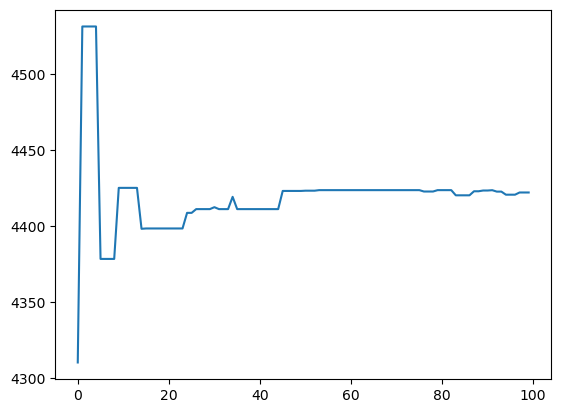

In [30]:
main()